<span style="display:block;text-align:center;margin-right:105px"><img src="../media/eth-masterclass-horizontal.png" width="200"/></span>

# Experiment Notebook: Network Yields

## Table of Contents

* [Overview](#Overview)
    * Research Question
    * Experiment Purpose
    * Scenario Analyses
    * Assumptions
* [Dependencies](#Dependencies)
* [Setup / Preparatory Steps](#Setup-/-Preparatory-Steps)
* [Scenario Analysis](#Scenario-Analysis)
    * [1. ...?](#)
        * Configuration
        * Execution
        * Output Preparation
        * Analysis
        * Conclusions
    * [2. ...?](#)
    
---

# Overview

## Research Question

What are the best and worst case network yields?

## Experiment Purpose

The purpose of this experiment notebook is to answer the research question above, ...

## Scenarios Analyses

1. ...

These analyses will be described in further detail in their corresponding section.

Finally, we will draw conclusions in each scenario analysis section.

## Assumptions

Our model adopts the base assumptions from the Hoban/Borgers "Ethereum 2.0 Economic Model". Due to the Altair updates since their model was released, and the state-space representation of our model, some of these assumptions were updated or adapted where necessary.

See [assumptions document](../ASSUMPTIONS.md) for further details.

# Dependencies

In [1]:
import copy
import logging

import setup
import visualizations as visualizations
import experiments.templates.revenue_net_yield_spread as revenue_net_yield_spread_template

from experiments.run import run

time: 1.11 s (started: 2021-05-28 10:03:26 +02:00)


# Setup / Preparatory Steps

In [2]:
visualizations.inspect_module(revenue_net_yield_spread_template)

import numpy as np

from model.state_variables import eth_staked, eth_supply
from experiments.base import experiment, TIMESTEPS, DELTA_TIME
from experiments.utils import generate_cartesion_product
from model.types import Phase


sweep = generate_cartesion_product({
    # ETH price range from 100 $/ETH to 3000 $/ETH
    "eth_price_samples": np.linspace(start=10, stop=100, num=20),
    # ETH staked range from genesis requirement to 5e6 ETH staked as in Hoban/Borgers report
    "eth_staked_samples": np.linspace(start=524_288, stop=5e6, num=20),
})

parameter_overrides = {
    "phase": [Phase.PHASE_0],
    "eth_price_process": [
        lambda run, _timestep: sweep["eth_price_samples"][run - 1]
    ],
    "eth_staked_process": [
        lambda run, _timestep: sweep["eth_staked_samples"][run - 1]
    ]
}

# Override base experiment parameters
experiment.simulations[0].model.params.update(parameter_overrides)
# Set runs to number of combinations in sweep
experiment.simulations[0].runs = len(sweep["eth_price_samples"])
# Run single timestep, set unit of time to multiple epochs
experiment.simulations[0].timesteps = 1
experiment.simulations[0].model.params.update({"dt": [TIMESTEPS * DELTA_TIME]})

time: 91 ms (started: 2021-05-28 10:03:27 +02:00)


In [5]:
logger = logging.getLogger()
logger.disabled = True

time: 1.4 s (started: 2021-05-28 10:05:20 +02:00)


# Scenario Analysis

### Configuration

### Execution

In [ ]:
df, exceptions = run(revenue_net_yield_spread_template.experiment)

### Output Preparation

In [ ]:
df

### Analysis

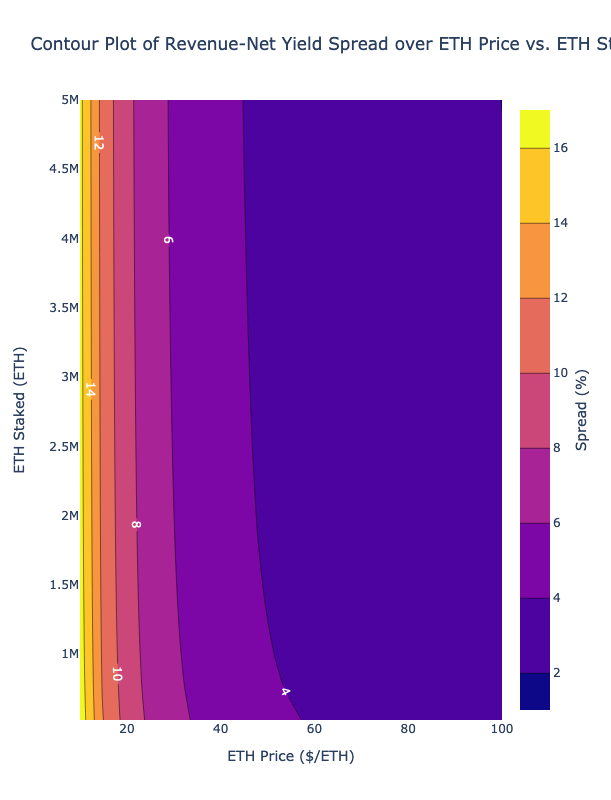

time: 123 ms (started: 2021-05-28 10:05:23 +02:00)


In [6]:
visualizations.plot_revenue_net_yield_spread(df)

### Conclusions